In [1]:
# never do this!
%conda install -c conda-forge regionmask

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import regionmask
regionmask.__version__

'0.6.2'

In [3]:
import xarray as xr
import numpy as np

In [4]:
airtemps = xr.tutorial.load_dataset('air_temperature')

In [5]:
myreg = regionmask.Regions(
    [
        np.array([[310, 50], [320, 60], [310, 70], [300, 60]])
    ],
    names=["myreg", ]
)
myreg

<regionmask.Regions>
Name:     unnamed

Regions:
 0  r0  myreg

[1 regions]

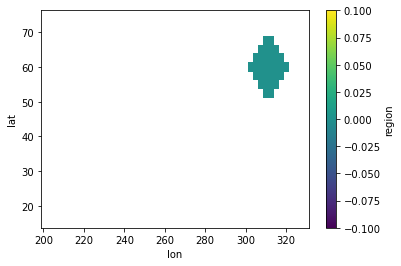

In [6]:
myreg.mask(airtemps).plot()

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


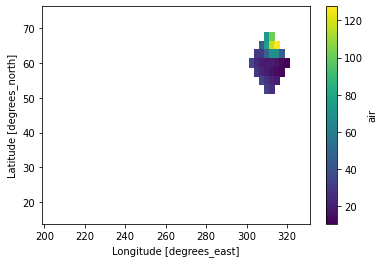

In [7]:
airtemps.air.where(
    ~myreg.mask(airtemps).astype(bool)
).var("time").plot()